<a href="https://colab.research.google.com/github/nitinsb/TensorFlow/blob/main/word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [ ]:
embedding_layer = layers.Embedding(1000, 32)
# argument 1000 --> number of words in vocubalary from 0 to 99 and 32 --> dim of embedding it is as good as hyperparameter
# random intilitsed and adjusted via backprop and have similarity between the words padding and trucation is der

In [ ]:
vocab_size = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=vocab_size)

In [ ]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

In [ ]:
print(train_data[0]) # each represents specific words from dictornary

In [ ]:
# convert integer back to text
word_index = keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])








In [ ]:
decode_review(train_data[0])

In [ ]:
maxlen = 500
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post', #
                                                        maxlen=maxlen)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=maxlen)


# to get padded sequence

In [ ]:
print(train_data[0])#observe padded zeroes at the end

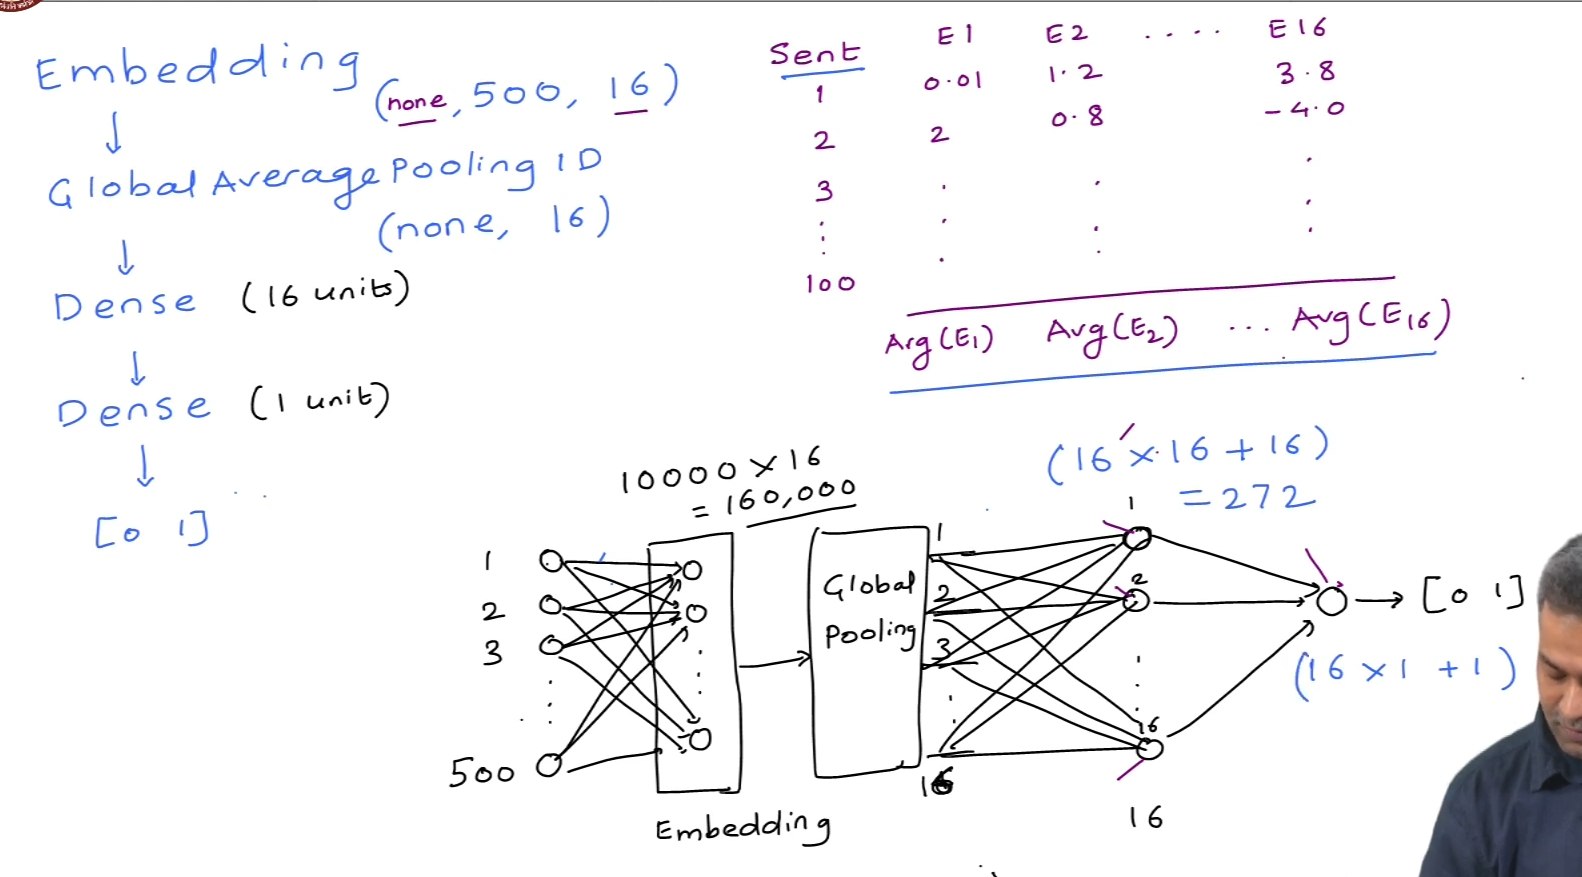

In [ ]:
embedding_dim = 16
model = keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])
model.summary()
# very important note here the vocab size and max length the emdeeing layer will have mappings from V * 16 not maxLength * 16 think carefully No bias

In [ ]:
# compile and train model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=512,
                    validation_data=(test_data, test_labels))

In [ ]:
import matplotlib.pyplot as plt
history_dict= history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')


In [ ]:
# retrive
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) #


In [ ]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\some_dir")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\some_dir")

out_v.close()
out_m.close()

In [ ]:
from google.colab import files
files.download('vecs.tsv')
files.download('meta.tsv')